**Data Preparation and Setup, including Library Imports**

Import necessary libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.impute import SimpleImputer
from scipy.stats import skew
from scipy.special import boxcox1p
import matplotlib.pyplot as plt

Import and Verify the Shape of the Training and Test Data in Pandas Dataframes

In [42]:
#Import the training and test data from CSV files into pandas dataframes
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

#Print the shape of the training and test dataframes to verify the number of rows and columns
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Training data shape: (1460, 81)
Test data shape: (1459, 80)


Viewing the first few rows of the loaded training and test data

In [43]:
#View the first few rows of the training data to check the data has been loaded properly
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
#View the first few rows of the test data to check the data has been loaded properly
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Data Preprocessing**

Dropping the 'Id' Feature

In [45]:
#Print the number of samples and features in the train and test dataframes before dropping the 'Id' feature
print("The train data size before dropping Id feature is : {} ".format(train_df.shape))
print("The test data size before dropping Id feature is : {} ".format(test_df.shape))

#Save the 'Id' column for both train and test dataframes
train_ID = train_df['Id']
test_ID = test_df['Id']

#Drop the 'Id' column from both train and test dataframes since it's not necessary for the prediction process.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

#Print the number of samples and features in the train and test dataframes after dropping the 'Id' feature
print("\nThe train data size after dropping Id feature is : {} ".format(train_df.shape))
print("The test data size after dropping Id feature is : {} ".format(test_df.shape))



The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


Processing Data and Removing Outliers: Visualizing the Relationship Between 'GrLivArea' and 'SalePrice' Using a Scatter Plot

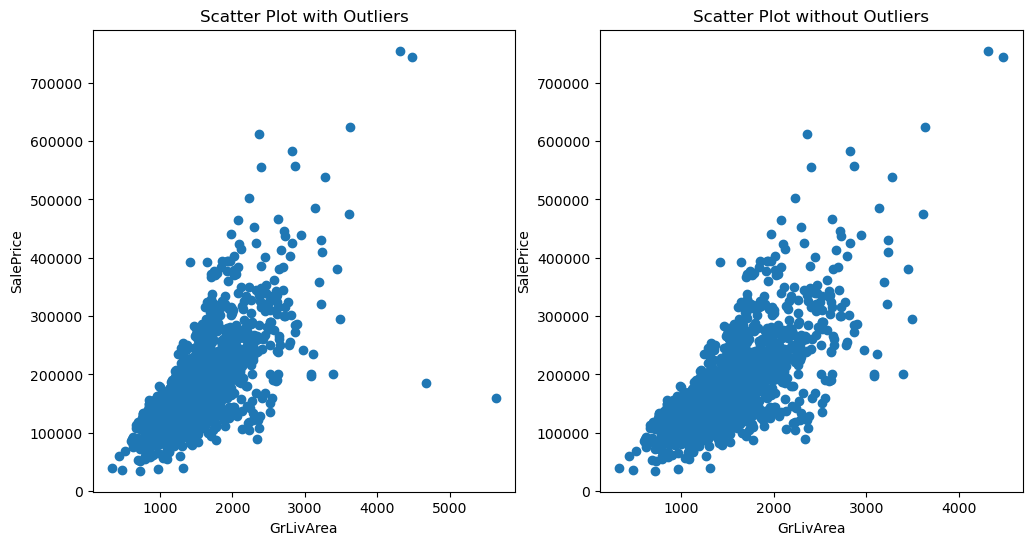

In [46]:
# Create a figure object with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Visualize the scatter plot with outliers on the first subplot
ax1.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
ax1.set_ylabel('SalePrice', fontsize=10)
ax1.set_xlabel('GrLivArea', fontsize=10)
ax1.set_title('Scatter Plot with Outliers')

# Drop the rows with GrLivArea greater than 4000 and SalePrice less than 300000
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)

# Visualize the scatter plot without outliers on the second subplot
ax2.scatter(train_df['GrLivArea'], train_df['SalePrice'])
ax2.set_ylabel('SalePrice', fontsize=10)
ax2.set_xlabel('GrLivArea', fontsize=10)
ax2.set_title('Scatter Plot without Outliers')

# Display the combined scatter plots on the screen
plt.show()


Remove Outliers: Drop Rows with Large GrLivArea and Low SalePrice

In [47]:
# Drop the rows with GrLivArea greater than 4000 and SalePrice less than 200000
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<200000)].index)


**Feature Engineering**

Concatenating Train and Test Data: Creating a Combined Dataset for Analysis

In [48]:
# Get the number of rows in the train and test datasets
ntrain = train_df.shape[0]
ntest = test_df.shape[0]

# Extract the target variable from the train dataset
y_train = train_df.SalePrice.values

# Concatenate the train and test datasets into a single dataframe
all_data = pd.concat([train_df, test_df], axis=0)

# Reset the index of the concatenated dataframe
all_data = all_data.reset_index(drop=True)

# Remove the 'SalePrice' column from the concatenated dataframe
all_data.drop(['SalePrice'], axis=1, inplace=True)

# Print the size of the concatenated dataframe
print("all_data size is : {}".format(all_data.shape))


all_data size is : (2917, 79)


Analyzing Missing Data in the Combined Dataset: Top Columns with Highest Missing Ratio

In [49]:
# Calculate the percentage of missing values in each column of the concatenated dataset
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

# Drop the columns with no missing values
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index)

# Sort the columns in descending order of missing values and keep the top 30
all_data_na = all_data_na.sort_values(ascending=False)[:30]

# Create a dataframe to store the missing data information
missing_data = pd.DataFrame({'Column': all_data_na.index, 'Missing Ratio (%)': all_data_na.values})

# Display the top  columns with missing data
missing_data.head(20)



,Column,Missing Ratio (%)
0,PoolQC,99.691464
1,MiscFeature,96.400411
2,Alley,93.212204
3,Fence,80.425094
4,FireplaceQu,48.680151
5,LotFrontage,16.660953
6,GarageFinish,5.450806
7,GarageQual,5.450806
8,GarageCond,5.450806
9,GarageYrBlt,5.450806


Visualizing Missing Data in the Combined Dataset: Bar Plot of Missing Values by Feature

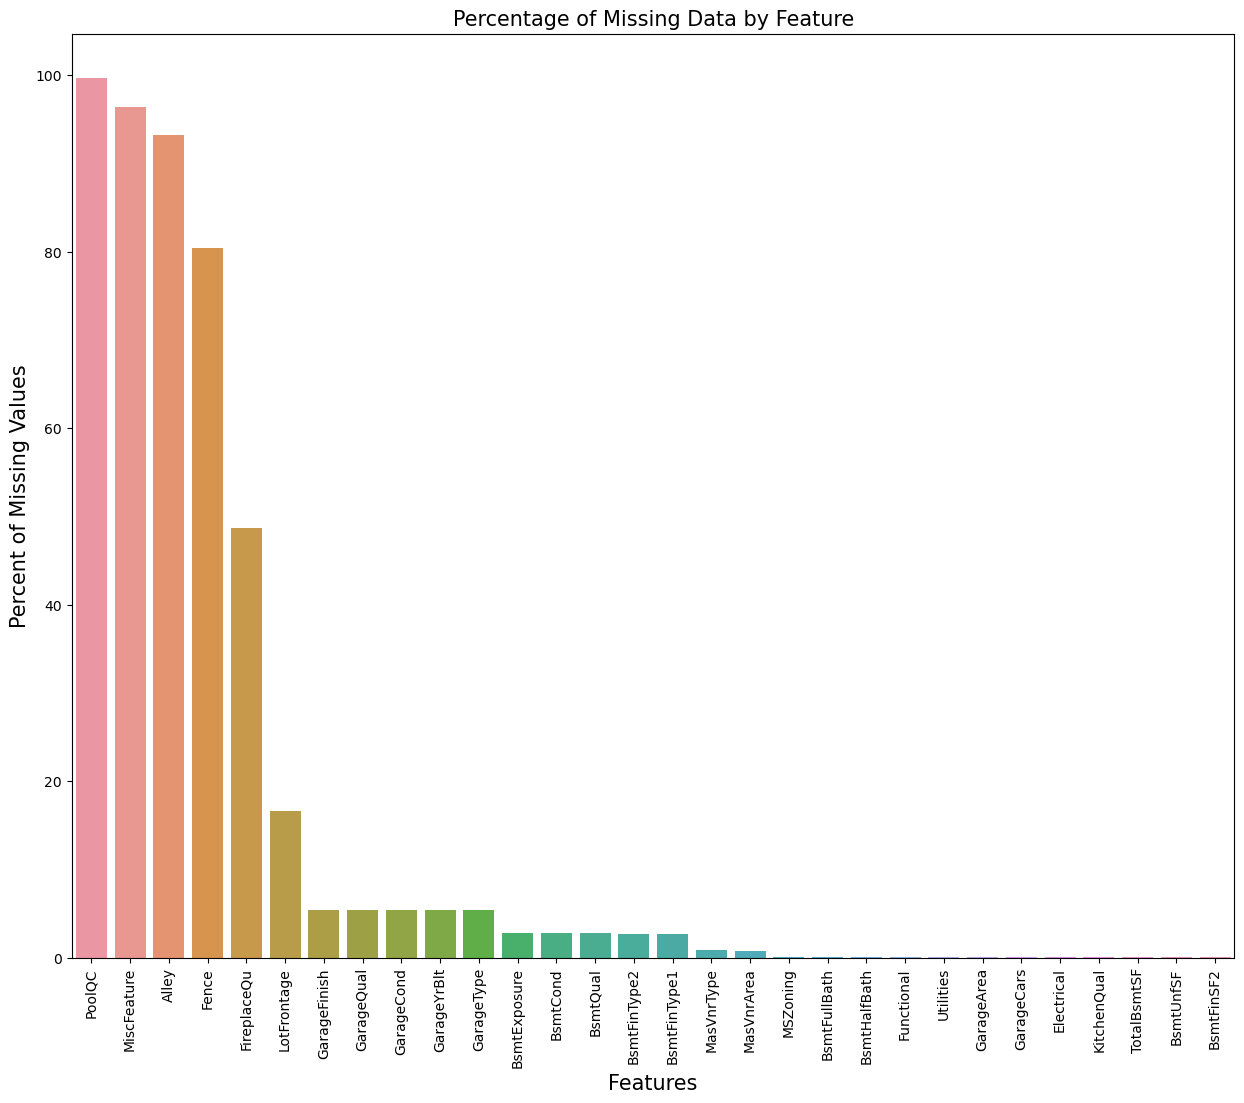

In [50]:
# Create a figure object with a single subplot
fig, ax = plt.subplots(figsize=(15, 12))

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Visualize the percentage of missing data for each feature using a bar plot
sns.barplot(x=all_data_na.index, y=all_data_na)

# Set the x-axis label and font size
plt.xlabel('Features', fontsize=15)

# Set the y-axis label and font size
plt.ylabel('Percent of Missing Values', fontsize=15)

# Set the title of the plot and font size
plt.title('Percentage of Missing Data by Feature', fontsize=15)

# Display the plot on the screen
plt.show()

Visualizing Correlation between Numerical Features and SalePrice using a Heatmap

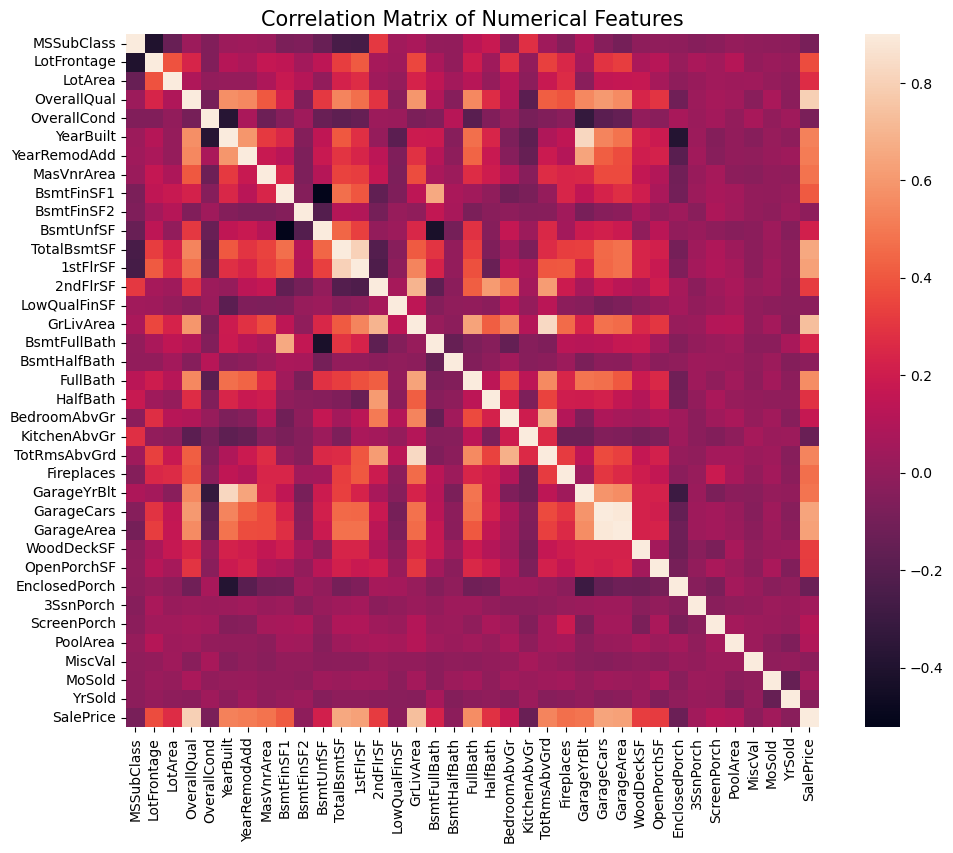

In [51]:
# Calculate the correlation matrix for the numerical columns of the train dataset
corrmat = train_df.select_dtypes(include=['float64', 'int64']).corr()

# Create a figure object with a single subplot
fig, ax = plt.subplots(figsize=(12,9))

# Visualize the correlation matrix using a heatmap
sns.heatmap(corrmat, vmax=0.9, square=True)

# Set the title of the plot
plt.title('Correlation Matrix of Numerical Features', fontsize=15)

# Display the plot on the screen
plt.show()


Imputing missing values using statistical measures and mode for categorical features in a dataset

In [52]:
# Impute missing values with 'None' for categorical features
categorical_cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 
                    "GarageType", "GarageFinish", "GarageQual", "GarageCond", 
                    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                    "BsmtFinType2", "MasVnrType"]

for col in categorical_cols:
    all_data[col] = all_data[col].fillna("None")

# Impute missing values with the median for LotFrontage feature
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# Impute missing values with 0 for numerical features
numerical_cols = ["MasVnrArea", "GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", 
                  "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]
for col in numerical_cols:
    all_data[col] = all_data[col].fillna(0)

# Impute missing values with the mode for remaining features
imputer = SimpleImputer(strategy='most_frequent')
remaining_cols = all_data.columns[all_data.isna().any()].tolist()
for col in remaining_cols:
    all_data[col] = imputer.fit_transform(all_data[[col]])

# Calculate the percentage of missing values in each feature
missing_percentage = all_data.isnull().sum() / len(all_data) * 100

# Remove features with no missing values and sort the rest in descending order
missing_percentage = missing_percentage.drop(missing_percentage[missing_percentage == 0].index)
missing_percentage = missing_percentage.sort_values(ascending=False)

# Create a DataFrame to display the missing values by percentage
missing_data = pd.DataFrame({'Missing Percentage': missing_percentage})
missing_data.head()



,Missing Percentage


Print the shape of the all_data dataframe to show the number of rows and columns

In [53]:
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 79)


Create a new feature by adding the TotalBsmtSF, 1stFlrSF, and 2ndFlrSF columns

In [54]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Identifying highly skewed numerical features in a dataset

In [55]:
# Get the indices of all numeric features
numeric_feats = all_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the skewness of each numeric feature and sort them in descending order
skewness = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Display the top 10 features with the highest skewness
print("Top 10 features with highest skewness:")
print(skewness.head(10))

Top 10 features with highest skewness:
MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
dtype: float64


Box Cox transformation for skewed numerical features in all_data dataframe

In [56]:
# Get the numeric features
numeric_feats = all_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the skewness of each numeric feature and sort them in descending order
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Select only the features with a skewness greater than 0.75
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]

# Print the number of skewed features
print("There are {} skewed numerical features to Box Cox transform".format(skewed_feats.shape[0]))

# Define the transformation parameter lambda
lam = 0.15

# Apply the Box Cox transformation to each skewed feature
for feat in skewed_feats.index:
    all_data[feat] = boxcox1p(all_data[feat], lam)



There are 22 skewed numerical features to Box Cox transform


One-hot encoding of categorical features

In [57]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 302)


Getting the One-Hot Encoded Train and Test Sets

In [58]:
train_df = all_data.iloc[:ntrain, :]
test_df = all_data.iloc[ntrain:, :]

**Modeling**

Import necessary libraries for Modeling

In [59]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

Function to compute Root Mean Squared Logarithmic Error (RMSLE) 

In [60]:
def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

Scale Continuous Features in Training and Testing DataFrames

In [61]:
# Create independent copies of train_df and test_df
train_df = train_df.copy()
test_df = test_df.copy()

# Scale the continuous features
cont_features = ['GrLivArea', 'TotalSF']
scaler = StandardScaler()

# Use .loc[] to update the training DataFrame
train_df.loc[:, cont_features] = scaler.fit_transform(train_df.loc[:, cont_features])

# Use .loc[] to update the testing DataFrame
test_df.loc[:, cont_features] = scaler.transform(test_df.loc[:, cont_features])

Split Data into Training, Validation, and Testing Sets

In [62]:
# Your dataset with input features
X = all_data.iloc[:ntrain, :]

# Split train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df, y_train, test_size=0.2, random_state=42)

Train and Evaluate Random Forest, Gradient Boosting, and XGBoost Regressors

In [63]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_val_preds = rf.predict(X_val)
rf_rmsle = compute_rmsle(y_val, rf_val_preds)
print(f"Random Forest Regressor RMSLE: {rf_rmsle}")

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_val_preds = gb.predict(X_val)
gb_rmsle = compute_rmsle(y_val, gb_val_preds)
print(f"Gradient Boosting Regressor RMSLE: {gb_rmsle}")

# XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_val_preds = xgb.predict(X_val)
xgb_rmsle = compute_rmsle(y_val, xgb_val_preds)
print(f"XGBoost Regressor RMSLE: {xgb_rmsle}")

Random Forest Regressor RMSLE: 0.15
Gradient Boosting Regressor RMSLE: 0.13
XGBoost Regressor RMSLE: 0.14


Select Best Model, Train on Full Data, and Make Predictions on Test Set

In [67]:
# Training the best model and predicting on test set
best_model = min((rf, 'Random Forest', rf_rmsle),
                 (gb, 'Gradient Boosting', gb_rmsle),
                 (xgb, 'XGBoost', xgb_rmsle),
                 key=lambda x: x[2])

print(f"Best Model: {best_model[1]} with RMSLE: {best_model[2]}")
best_model[0].fit(X_train, y_train)  # Use the entire training data
predictions = best_model[0].predict(test_df)

Best Model: Gradient Boosting with RMSLE: 0.13


Plot True Values vs. Predictions for Random Forest, Gradient Boosting, and XGBoost Regressors

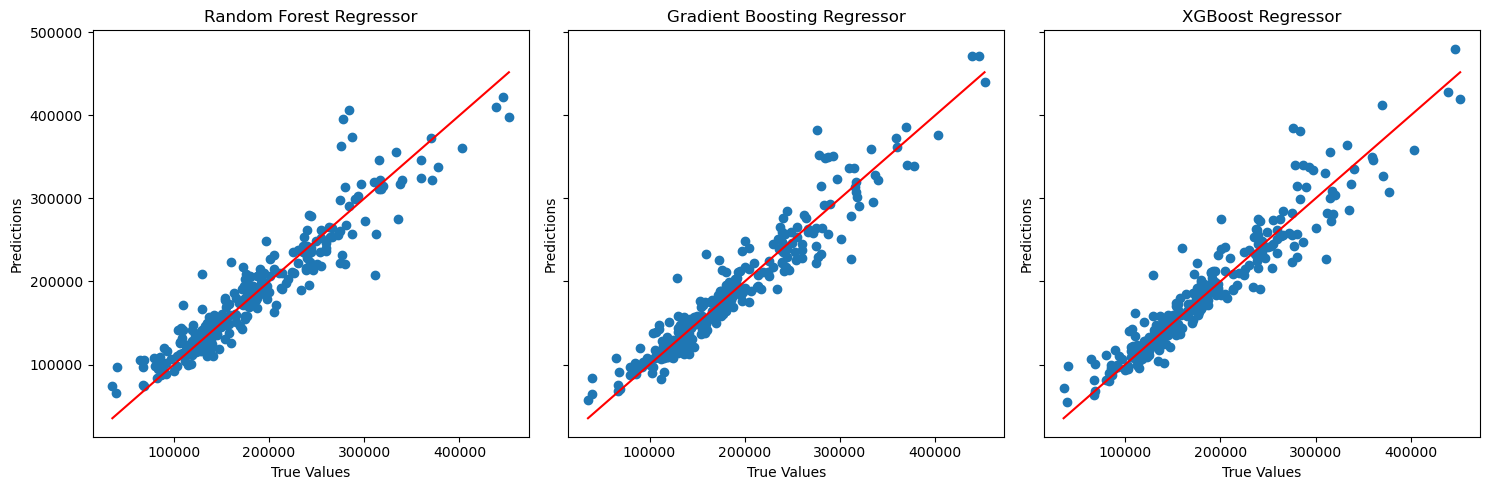

In [68]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axes = axes.ravel()

# Random Forest Regressor
axes[0].scatter(y_val, rf_val_preds)
axes[0].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')
axes[0].set_title("Random Forest Regressor")
axes[0].set_xlabel("True Values")
axes[0].set_ylabel("Predictions")

# Gradient Boosting Regressor
axes[1].scatter(y_val, gb_val_preds)
axes[1].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')
axes[1].set_title("Gradient Boosting Regressor")
axes[1].set_xlabel("True Values")
axes[1].set_ylabel("Predictions")

# XGBoost Regressor
axes[2].scatter(y_val, xgb_val_preds)
axes[2].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')
axes[2].set_title("XGBoost Regressor")
axes[2].set_xlabel("True Values")
axes[2].set_ylabel("Predictions")

# Display the subplots
plt.tight_layout()
plt.show()


Save and display the predictions of a model

In [69]:
# Save the predictions to a CSV file
predictions_df = pd.DataFrame({'Id': range(1461, 1461+ntest), 'SalePrice': predictions})
predictions_df.to_csv('predictions.csv', index=False)

# Display the predictions
print(predictions_df.head(20))

      Id      SalePrice
0   1461  119702.146766
1   1462  172258.308375
2   1463  188019.177676
3   1464  188568.006317
4   1465  185056.546108
5   1466  174552.005761
6   1467  178625.704705
7   1468  168119.125852
8   1469  184318.455708
9   1470  127133.499765
10  1471  203212.709535
11  1472   95964.728253
12  1473   96782.049597
13  1474  154916.800068
14  1475  119822.211192
15  1476  399218.856929
16  1477  250984.012580
17  1478  281941.285664
18  1479  279047.789600
19  1480  533090.336006
